# Firm Entry and Exit - Week 4 - OSE Lab
## Thomas Pellet
### 07/2019

## Question 1: Define a Recursive Equilibrium

In [ ]:
# Defin

## Question 2: Compute Representative Agent Steady State

## Question 3: Solve for Incumbent Firms' Decision Rules

In [28]:
# Define Parameters in the model

θ, ν, δ, β, ϕ, Nrep, Nϵ, cf, W_ss = .21, .64, .1, 96, .5, .6, 10, 0.01, 0.4
#Tauchen parameters
ρ,μ,σ =.9,0,.02




# Production function
prod  = lambda ϵ, k, n: np.exp(ϵ) * k**θ * n**ν

# LOM capital 
LOM_k = lambda k, i: (1-δ)*k + i

# Wages
w_f     = lambda ϵ, k, n: ν * np.exp(ϵ) * k**θ * n**(ν-1)

# Interest rate
r_f     = lambda ϵ, k, n: θ * np.exp(ϵ) * k**(θ-1) * n**ν

# Profits
Π     = lambda y, kp, k, n, w, r: y - w*n - (kp - (1 + r - δ)*k) - 0.5*ϕ * \
        (kp/k - (1-δ))**2*k

#Budget constraint
BC    = lambda c, k, n, w, r, i, ϵ: c - prod(ϵ, k, n) - w(ϵ, k, n)*n - i

# Utility function
def Uprime(c):
    if c > 0:
        return 1/c
    else:
        return 50000000



In [35]:
import numpy as np
from scipy.optimize import minimize
from scipy import interpolate
from matplotlib import pyplot as plt
import tauchen

sizeK = 20
tol, epsi, maxiter =1e-8,1, 1000

### State space K
Kmin=.1
Kmax=1
Kgrid=np.linspace(Kmin,Kmax,sizeK)

### State space epsilon, from Tauchen

[A, P] = tauchen.approx_markov(ρ, σ, m=3, n=Nϵ)  #b is the constant in the AR1 and m is the standard deviation span #b is the constant in the AR1 and m is the standard deviation span


def interpolant(x,Kgrid,Vp):
    t= interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)


def entrychoice(Kgrid,getValue1, prod, Uprime, interpolant, Vp, x, j, l, A, P, Π, W, r_f, Nϵ, Nrep, cf):
    # Simple exit payoff
    exitpayoff = (1-δ)*Kgrid[j]
    
    #Compute entry payoff
    Value1_at_x  = lambda x: getValue1(prod, Uprime, interpolant, Kgrid, Vp, x, j, l, A, P, Π, W, r_f, Nϵ, Nrep)
    entrypayoff = Value1_at_x(x) - cf

    if entrypayoff > exitpayoff:
        entry[j,l] = 1
        return -entrypayoff
    else:
        return -exitpayoff


def getValue1(prod, Uprime, interpolant, Kgrid, Vp, x, j, l, A, P, Π, W, r_f, Nϵ, Nrep):
    
    exp=np.zeros(Nϵ) # Dimension of exp is dimension of A, number of shocks
    for i in range(Nϵ):
        exp[i] = β * P[l,i]*interpolant(x,Kgrid,Vp[:,i])
        
    FutureVal = np.sum(exp)  
    
    Y         = prod(A[l], Kgrid[j], Nrep)
#     W         = w_f(A[l], Kgrid, Nrep)
    R         = r_f(A[l], Kgrid[j], Nrep)
    profit    = Π(Y, x, Kgrid[j], Nrep, W, R)
    V         = profit + FutureVal
    
    return V



iter= 0
Vp=Kmin*np.ones([sizeK,Nϵ])
Kp=Kmin*np.ones([sizeK,Nϵ])
entry =np.zeros([sizeK,Nϵ])
Vp_new=np.zeros([sizeK,Nϵ])
Kp_new=np.zeros([sizeK,Nϵ])

while iter < maxiter:

    for j in range(sizeK):
        print('Grid point number ', j)
        
        for l in range(Nϵ):
#             print('Random shock number ', l)
            # Make the value function dependent on future K
            Entry_x = lambda x: entrychoice(Kgrid,getValue1, prod, Uprime, interpolant, Vp, x, j, l, A, P, Π, W_ss, r_f, Nϵ, Nrep, cf)
            solve = minimize(Entry_x,Kp[j,l])
            Kp_new[j,l] = solve.x
            Vp_new[j,l] = - solve.fun

    epsi = np.max(np.abs(Kp_new-Kp))
    print("Error term: ", epsi)
    if epsi < tol:
        break
        
    #Update
    Kp=Kp_new*1.
    Vp = Vp_new*1.
    iter=iter+1

Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  1.2000002861024845
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  232.50338539456897
Grid point number  0
Grid point number  1
Grid point number  2
Grid point nu

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Error term:  45186640.47
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  11296664.157499999
Grid point number  0
Grid point number  1
Grid point number  2
Grid point number  3
Grid point number  4
Grid point number  5
Grid point number  6
Grid point number  7
Grid point number  8
Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  690.3350036591291
Grid point number  0
Grid point number  1
Grid point

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:155: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:155: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\sit

Grid point number  9
Grid point number  10
Grid point number  11
Grid point number  12
Grid point number  13
Grid point number  14
Grid point number  15
Grid point number  16
Grid point number  17
Grid point number  18
Grid point number  19
Error term:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:155: RuntimeWarning: invalid value encountered in true_divide
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:155: RuntimeWarning: invalid value encountered in less
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:613: RuntimeWarning: overflow encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
C:\ProgramData\Anaconda3\lib\sit

<function matplotlib.pyplot.show(*args, **kw)>

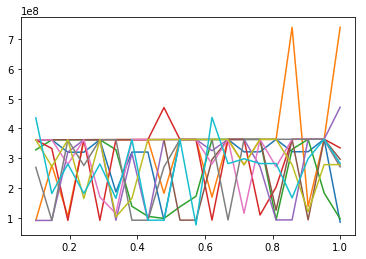

In [37]:
for i in range(Nϵ):
    plt.plot(Kgrid, Kp[:,i])
plt.show